In [1]:
import sys
sys.path.append(r"C:\Users\rlgus\Project")

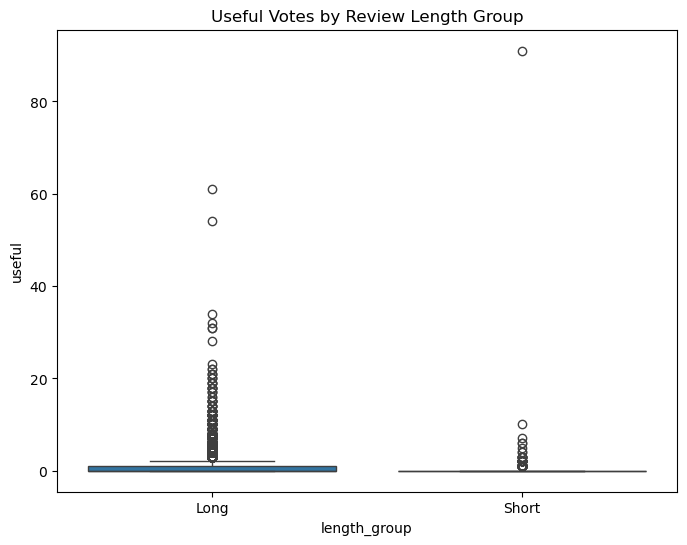

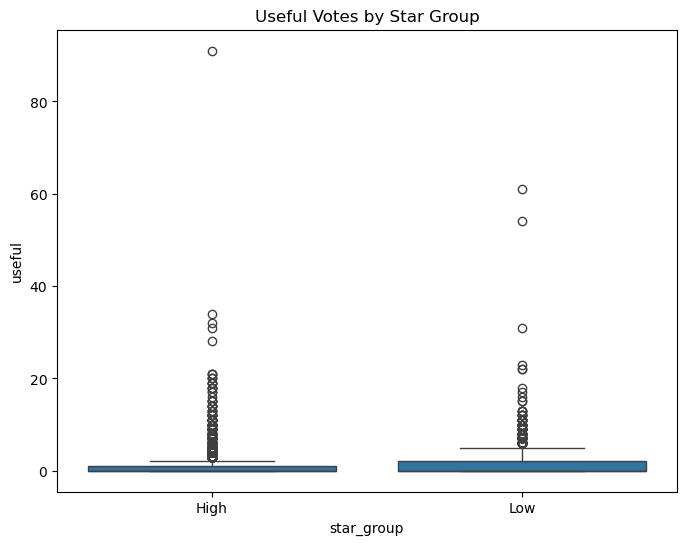

                      user_id  review_count  useful   roi
15060  p8oPsHwTO-gzJrgrKFuwtw             1      91  91.0
6743   MrSURw5o40IqfaHnFN8Rog             1      61  61.0
11654  cv3nrm6Vp1MahE0HrHOPXg             1      54  54.0
12564  gPxEPjAykNqv-p3gsYOXsQ             1      34  34.0
12508  gA9zk0LimSqkX_B2lqxJUw             1      32  32.0
Length group Mann-Whitney U test: stat=4746516.0, p=7.05e-21
Star group Mann-Whitney U test: stat=29819540.5, p=1.41e-50


In [2]:
from src.load_data import load_reviews
from src.preprocessing import preprocess_reviews
from src.analysis import plot_box, mann_whitney_test
from src.marketing import compute_user_marketing

# 데이터 로드
#df = load_reviews("data/yelp_academic_dataset_review.json", n_rows=20000)
df = load_reviews("../data/yelp_academic_dataset_review.json", n_rows=20000)

# 전처리
df = preprocess_reviews(df)

# -------------------------------
# 1️⃣ 리뷰 길이 실험
# -------------------------------
plot_box(df, "length_group", "useful", "Useful Votes by Review Length Group")
stat_len, p_len = mann_whitney_test(df, "length_group", "useful", "Short", "Long")

# -------------------------------
# 2️⃣ 별점 실험
# -------------------------------
plot_box(df[df["star_group"]!="Mid"], "star_group", "useful", "Useful Votes by Star Group")
stat_star, p_star = mann_whitney_test(df[df["star_group"]!="Mid"], "star_group", "useful", "Low", "High")

# -------------------------------
# 3️⃣ 고객 행동 + 마케팅 지표
# -------------------------------
user_summary = compute_user_marketing(df)
print(user_summary.sort_values("roi", ascending=False).head())

# -------------------------------
# 4️⃣ 결과 요약
# -------------------------------
print(f"Length group Mann-Whitney U test: stat={stat_len}, p={p_len:.2e}")
print(f"Star group Mann-Whitney U test: stat={stat_star}, p={p_star:.2e}")